In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

pd.reset_option('display.max_colwidth')
def preprocessing_answer(text):
    text = text.lower()  # Ubah ke lowercase
    text = re.sub(r"[^a-zA-Z0-9\s]", ' ', text)  # Hapus karakter khusus
    text = ' '.join(text.split())  # Hapus spasi berlebih
    return text

df_raw = pd.read_csv("data/aes_dataset_5k_clean.csv")
df_raw = df_raw[df_raw['dataset'] == 'analisis_essay']
print(df_raw.info())
print("=========")
df_raw[df_raw['answer'] == '- ']

<class 'pandas.core.frame.DataFrame'>
Index: 2162 entries, 0 to 2161
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2162 non-null   object 
 1   reference_answer  2162 non-null   object 
 2   answer            2162 non-null   object 
 3   score             2162 non-null   float64
 4   normalized_score  2162 non-null   float64
 5   multibert_length  2162 non-null   int64  
 6   dataset           2162 non-null   object 
 7   dataset_num       2162 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 152.0+ KB
None


,question,reference_answer,answer,score,normalized_score,multibert_length,dataset,dataset_num
526,Bagaimana hubungan berfikir positif terhadap p...,Otak merupakan bagian terpenting dari tubuh ma...,-,0.0,0.0,86,analisis_essay,analisis_essay-10
1468,Apa perbedaan hukum perdata dan hukum pidana?,Hukum perdata adalah hukum yang mengatur hubun...,-,0.0,0.0,95,analisis_essay,analisis_essay-27
1936,Apa yang dimaksud dengan volatile memory?,Volatile memory adalah memory yang datanya dap...,-,0.0,0.0,52,analisis_essay,analisis_essay-36
2091,Apa yang dimaksud topologi jaringan LAN dan se...,Topologi jaringan adalah struktur jaringan fis...,-,0.0,0.0,100,analisis_essay,analisis_essay-39


In [3]:
df_raw['answer'].iloc[2091]

'- '

In [4]:
# preprocessing
df_raw['reference_answer'] = df_raw['reference_answer'].apply(preprocessing_answer)
df_raw['answer'] = df_raw['answer'].apply(preprocessing_answer)

# melihat null atau string kosong
df_raw[['reference_answer', 'answer', 'score']].head()
print("=========")
df_raw[df_raw['answer'] == ''][['reference_answer', 'answer', 'score']]

,reference_answer,answer,score
526,otak merupakan bagian terpenting dari tubuh ma...,,0.0
1468,hukum perdata adalah hukum yang mengatur hubun...,,0.0
1936,volatile memory adalah memory yang datanya dap...,,0.0
2091,topologi jaringan adalah struktur jaringan fis...,,0.0


In [5]:
#DROP ISNA
df_raw = df_raw[df_raw['answer'].notna() & (df_raw['answer'].str.strip() != "")]

In [6]:
df_raw[df_raw['answer'] == ''][['reference_answer', 'answer', 'score']]

,reference_answer,answer,score


In [7]:
df_raw[df_raw['answer'].duplicated()][['reference_answer', 'answer', 'score']][20:]

,reference_answer,answer,score
695,rio haryanto lahir di solo jawa tengah rio mer...,pembalap f1 yang berasa dari solo jawa tengah ...,27.0
718,rio haryanto lahir di solo jawa tengah rio mer...,rio haryanto lahir di solo jawa tengah 22 janu...,80.0
727,rio haryanto lahir di solo jawa tengah rio mer...,rio haryanto lahir di solo jawa tengah 22 janu...,55.0
783,block adalah upaya menggagalkan serangan smash...,block dalam bola voli ialah menahan serangan d...,26.0
799,memulai pertandingan terjadinya gol memulai ba...,memulai pertandingan terjadinya gol memulai ba...,100.0
...,...,...,...
2147,bluetooth adalah perangkat yang menjadi media ...,bluetooth adalah spesifikasi industri untuk ja...,32.0
2148,bluetooth adalah perangkat yang menjadi media ...,bluetooth adalah spesifikasi industri untuk ja...,28.0
2153,bluetooth adalah perangkat yang menjadi media ...,bluetooth adalah spesifikasi industri untuk ja...,42.0
2155,bluetooth adalah perangkat yang menjadi media ...,bluetooth adalah suatu peralatan media komunik...,48.0


In [8]:
df_raw[(df_raw['answer'].duplicated()) & (df_raw['dataset_num'] == 'analisis_essay-37')]['answer']

1964    liquid crystal display central processing unit...
1971    lcd liquid crystal display cpu central process...
1975    liquid crystal display central processing unit...
1979    lcd liquid crystal display cpu central process...
1985    lcd liquid crystal display cpu central process...
1987    lcd liquid cristal display cpu central process...
1991    lcd adalah liquid crystal display cpu adalah c...
1993    lcd liquid crystal display cpu central process...
1994    lcd liquid crystal display cpu central process...
1996    lcd adalah liquid crystal display cpu adalah c...
2001    lcd liquid crystal display cpu central process...
2003    liquid crystal display central processing unit...
2004    lcd liquid crystal display cpu central process...
2005    lcd liquid crystal display cpu central process...
2007    cpu central processing unit lcd liquid crystal...
Name: answer, dtype: object

In [19]:
pd.set_option('display.max_colwidth', None)
text = ['memulai pertandingan terjadinya gol memulai babak kedua memulai babak perpanjangan waktu', 'bluetooth adalah spesifikasi industri untuk jaringan kawasan pribadi personal area networks atau pan tanpa kabel bluetooth menghubungkan dan dapat dipakai untuk melakukan tukar menukar informasi di antara peralatan peralatan']
atas = df_raw[df_raw['answer'].isin(text)][['answer', 'score']].head(2)
bawah = df_raw[df_raw['answer'].isin(text)][['answer', 'score']].tail(2)
concat = pd.concat([atas, bawah], axis=0)
concat

,answer,score
792,memulai pertandingan terjadinya gol memulai babak kedua memulai babak perpanjangan waktu,100.0
799,memulai pertandingan terjadinya gol memulai babak kedua memulai babak perpanjangan waktu,100.0
2147,bluetooth adalah spesifikasi industri untuk jaringan kawasan pribadi personal area networks atau pan tanpa kabel bluetooth menghubungkan dan dapat dipakai untuk melakukan tukar menukar informasi di antara peralatan peralatan,32.0
2153,bluetooth adalah spesifikasi industri untuk jaringan kawasan pribadi personal area networks atau pan tanpa kabel bluetooth menghubungkan dan dapat dipakai untuk melakukan tukar menukar informasi di antara peralatan peralatan,42.0


In [20]:
pd.reset_option('display.max_colwidth')
df_raw[df_raw['score']==0]

,question,reference_answer,answer,score,normalized_score,multibert_length,dataset,dataset_num
70,Deskripsikan 4 manfaat telur untuk kesehatan?,1 bermanfaat untuk pasien kemoterapi karena ka...,vitamin,0.0,0.0,190,analisis_essay,analisis_essay-2
80,Deskripsikan 4 manfaat telur untuk kesehatan?,1 bermanfaat untuk pasien kemoterapi karena ka...,mencegah ketombe,0.0,0.0,194,analisis_essay,analisis_essay-2
100,Deskripsikan 4 manfaat telur untuk kesehatan?,1 bermanfaat untuk pasien kemoterapi karena ka...,endok endok endok endok,0.0,0.0,197,analisis_essay,analisis_essay-2
162,Sebutkan lebih dari 10 cara merawat kesehatan ...,1 selalu lindungi rambutmu dari sinar matahari...,berdoa membaca bismillah,0.0,0.0,260,analisis_essay,analisis_essay-3
298,Jelaskan yang dimaksud dengan gaya hidup hedon...,gaya hidup hedonis hedonism adalah suatu pola ...,tidak tahu,0.0,0.0,93,analisis_essay,analisis_essay-6
...,...,...,...,...,...,...,...,...
1926,Apa yang dimaksud dengan volatile memory?,volatile memory adalah memory yang datanya dap...,pengertian topologi jaringan komputer adalah s...,0.0,0.0,83,analisis_essay,analisis_essay-36
2008,"Apa kepanjangan dari LCD, CPU dan GPS?",lcd liquid crystal display cpu central process...,haha,0.0,0.0,45,analisis_essay,analisis_essay-37
2090,Apa yang dimaksud topologi jaringan LAN dan se...,topologi jaringan adalah struktur jaringan fis...,baper,0.0,0.0,101,analisis_essay,analisis_essay-39
2135,Apa yang dimaksud dengan Bluetooth?,bluetooth adalah perangkat yang menjadi media ...,blue biru tooth gigi jadi gigi biru,0.0,0.0,77,analisis_essay,analisis_essay-40


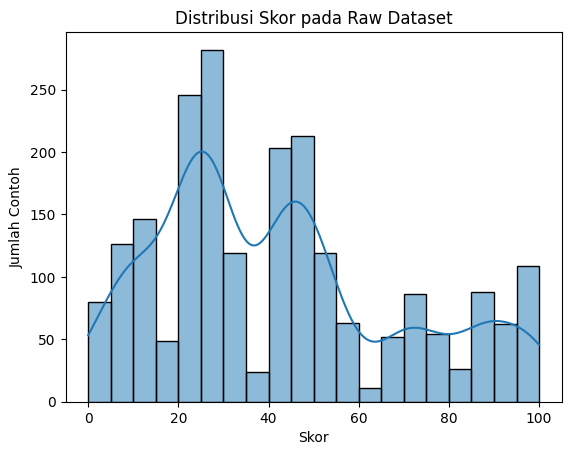

In [21]:
plt.figure()
sns.histplot(df_raw['score'], bins=20, kde=True)
plt.title('Distribusi Skor pada Raw Dataset')
plt.xlabel('Skor')
plt.ylabel('Jumlah Contoh')
plt.show()

## DELETE DUPLICATE DATA RAHUTOMO

In [22]:
print("before")
print(df_raw.info())
print(df_raw['dataset_num'].value_counts())
agg_dict = {col: 'first' for col in df_raw.columns if col not in ['answer', 'score']}
agg_dict['score'] = 'mean'
df_raw = df_raw.groupby('answer', as_index=False).agg(agg_dict)
df_raw
print("after")
print(df_raw.info())
print(df_raw['dataset_num'].value_counts())
df_raw = df_raw[['question', 'reference_answer', 'answer', 'score', 'dataset', 'dataset_num']].sort_values('dataset_num')
df_raw.to_csv("data/rahutomo_clean.csv", index=False)

before
<class 'pandas.core.frame.DataFrame'>
Index: 2158 entries, 0 to 2161
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question          2158 non-null   object 
 1   reference_answer  2158 non-null   object 
 2   answer            2158 non-null   object 
 3   score             2158 non-null   float64
 4   normalized_score  2158 non-null   float64
 5   multibert_length  2158 non-null   int64  
 6   dataset           2158 non-null   object 
 7   dataset_num       2158 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 151.7+ KB
None
dataset_num
analisis_essay-1     57
analisis_essay-6     57
analisis_essay-13    57
analisis_essay-8     57
analisis_essay-7     57
analisis_essay-2     57
analisis_essay-5     57
analisis_essay-4     57
analisis_essay-3     57
analisis_essay-9     56
analisis_essay-14    56
analisis_essay-11    56
analisis_essay-10    55
analisis_essay-12    55
anali

In [23]:
df_raw[df_raw['answer'].duplicated()]

,question,reference_answer,answer,score,dataset,dataset_num
